In [122]:
import pandas as pd
import numpy as np
import matplotlib as plt
import yfinance as yf
import pandas_datareader.data as web
import datetime as dt

In [ ]:
# code to extract 15 minute data from Yahoo Finance
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

def download_intraday_data(ticker, start_date, end_date, interval="15m", chunk_days=30):
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    df_all = []

    while start < end:
        chunk_end = min(start + timedelta(days=chunk_days), end)
        print(f"Fetching: {start.date()} to {chunk_end.date()}")

        df = yf.download(
            ticker,
            start=start.strftime('%Y-%m-%d'),
            end=chunk_end.strftime('%Y-%m-%d'),
            interval=interval,
            progress=False
        )
        
        if not df.empty:
            df_all.append(df)

        # Add a buffer of 1 minute to avoid overlapping rows
        start = chunk_end + timedelta(minutes=1)

    # Combine all chunks
    if df_all:
        final_df = pd.concat(df_all)
        final_df = final_df[~final_df.index.duplicated(keep='first')]  # Remove any duplicate rows
        return final_df
    else:
        print("No data returned.")
        return pd.DataFrame()

# Example usage:
df_spy_15m = download_intraday_data("SPY", start_date="2023-12-01", end_date="2024-04-01", interval="15m")
print(df_spy_15m.head())


# Add forecast vs actual data

In [178]:
import openpyxl
sheets_dict = pd.read_excel('act vs forecast.xlsx', sheet_name=None)

# Extract each sheet into separate DataFrames
df1 = sheets_dict[list(sheets_dict.keys())[0]]
df2 = sheets_dict[list(sheets_dict.keys())[1]]
df3 = sheets_dict[list(sheets_dict.keys())[2]]
df4 = sheets_dict[list(sheets_dict.keys())[3]]
df5 = sheets_dict[list(sheets_dict.keys())[4]]

# Optional: print sheet names to verify
print("Sheet names:", list(sheets_dict.keys()))

Sheet names: ['CPI', 'PPI', 'GDP', 'nonfarm', 'employment rate']


In [138]:
df1['Release Date'].head()

0    2025-04-10
1    2025-03-12
2    2025-02-12
3    2025-01-15
4    2024-12-11
Name: Release Date, dtype: object

In [179]:

for df in [df1, df2, df3, df4, df5]:
    #df = df.drop('Time', axis=1)
    df['Release Date'] = df['Release Date'].str.replace(r"\s*\(.*\)", "", regex=True)  # remove (anything)
    df['Release Date'] = pd.to_datetime(df['Release Date'], format='%b %d, %Y')
    df['Release Date'] = df['Release Date'].dt.date

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release Date  66 non-null     object 
 1   Time          66 non-null     object 
 2   Actual_CPI    65 non-null     float64
 3   Forecast_CPI  66 non-null     float64
 4   Previous_CPI  66 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.7+ KB


In [180]:
df1.drop('Time', axis=1, inplace=True)
df2.drop('Time', axis=1, inplace=True)
df3.drop('Time', axis=1, inplace=True)
df4.drop('Time', axis=1, inplace=True)
df5.drop('Time', axis=1, inplace=True)


In [181]:

df1['Release Date'] = pd.to_datetime(df1['Release Date'])
df2['Release Date'] = pd.to_datetime(df1['Release Date'])
df3['Release Date'] = pd.to_datetime(df1['Release Date'])
df4['Release Date'] = pd.to_datetime(df1['Release Date'])
df5['Release Date'] = pd.to_datetime(df1['Release Date'])
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release Date  66 non-null     datetime64[ns]
 1   Actual_GDP    66 non-null     float64       
 2   Forecast_GDP  66 non-null     float64       
 3   Previous_GDP  66 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.2 KB


In [182]:
for df in [df1, df2, df3, df4, df5]:
    df.rename(columns={'Release Date': 'ds'}, inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            66 non-null     datetime64[ns]
 1   Actual_CPI    65 non-null     float64       
 2   Forecast_CPI  66 non-null     float64       
 3   Previous_CPI  66 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.2 KB


In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            66 non-null     datetime64[ns]
 1   Actual_CPI    65 non-null     float64       
 2   Forecast_CPI  66 non-null     float64       
 3   Previous_CPI  66 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.2 KB


The varible i am entering to the prediction :

GOLD,SILVER,DXY,JPY/USD,EUR/USD,OIL,NET GAS,10 YEAR YIELD,2 YEAR YIELD, BITCOIN,VIX

To creat:
gold/silver, yield curve, presentage change, angel of movment, number of up/down days in a row, dummi for if bid data day & dummie if supprise up/down.

Advance:
options analysis : IV, IV rank, SKEW, ASK/BID RATIO (on put and call), OI & col analysis - where is a lot of oi (put/call) is traders raise or dropping OI.

## 5 years of data

In [124]:
start = "2020-01-01"
end = "2025-04-04"

## 2 year yields - not from yahoo

In [123]:
#start = datetime.datetime(2010, 1, 1)
#end = datetime.datetime.today()

# 'DGS2' = 2-Year Constant Maturity Treasury yield (%)
yield_2y = web.DataReader('DGS2', 'fred', start, end)
yield_2y =yield_2y.reset_index()
yield_2y =yield_2y.drop('DATE',axis=1)


print(yield_2y.head())

   DGS2
0   NaN
1  1.58
2  1.53
3  1.54
4  1.54


## Target varible: SPY

In [125]:
#aapl = yf.download("AAPL", start=start, end=end)
#print(data.tail())
SPY = yf.download("SPY", start=start, end=end)[['Close', 'Volume']]
SPY.columns = ['SPY_Close', 'SPY_Volume']
print(SPY.head())
#BIT = yf.download("GLD", start=start,end=end)

[*********************100%***********************]  1 of 1 completed

             SPY_Close  SPY_Volume
Date                              
2020-01-02  300.291656    59151200
2020-01-03  298.017670    77709700
2020-01-06  299.154602    55653900
2020-01-07  298.313507    40496400
2020-01-08  299.903412    68296000


In [55]:
print(SPY.index)
SPY=SPY.reset_index()
SPY =SPY.rename(columns={'Date':'ds'})

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2025-03-21', '2025-03-24', '2025-03-25', '2025-03-26',
               '2025-03-27', '2025-03-28', '2025-03-31', '2025-04-01',
               '2025-04-02', '2025-04-03'],
              dtype='datetime64[ns]', name='Date', length=1321, freq=None)


In [56]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          1321 non-null   datetime64[ns]
 1   SPY_Close   1321 non-null   float64       
 2   SPY_Volume  1321 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 31.1 KB


# Add events:

In [120]:
events = pd.read_csv(r'cpi_release_dates_2020_2025.csv')

events =events.rename(columns={'Date':'ds'})
events['ds'] = pd.to_datetime(events['ds'],format='%Y-%m-%d')
SPY_events =SPY.copy()
event_grouped = events.groupby('ds')['event'].apply(lambda x: ', '.join(x)).reset_index()
SPY_events = SPY_events.merge(event_grouped, on='ds', how='left')

#print(SPY_events[['ds','event_y']].head(20))
SPY_events['event'] = SPY_events['event'].fillna('none event')  # Fill missing events
#SPY_events = SPY_events.drop(columns=['event_y','event_x'])
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          1321 non-null   datetime64[ns]
 1   SPY_Close   1321 non-null   float64       
 2   SPY_Volume  1321 non-null   int64         
 3   month       1321 non-null   int32         
 4   day         1321 non-null   int32         
 5   event       1321 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 51.7+ KB


In [188]:
SPY_events['is_event'] = SPY_events['event'].apply(lambda x: 1 if x != 'none event' else 0)

In [48]:
print(SPY_events.iloc[15:30, :])

           ds   SPY_Close  SPY_Volume                   event
15 2020-01-23  306.623322    51963000              none event
16 2020-01-24  303.896454    87578400              none event
17 2020-01-27  299.025299    84062500              none event
18 2020-01-28  302.158813    63834000              none event
19 2020-01-29  301.909119    53888900            FOMC Meeting
20 2020-01-30  302.888977    75491800                     GDP
21 2020-01-31  297.389160   113845600              none event
22 2020-02-03  299.598358    69083000  ISM Manufacturing ,PMI
23 2020-02-04  304.164612    62573200              none event
24 2020-02-05  307.677032    65951100              none event
25 2020-02-06  308.712341    50359700              none event
26 2020-02-07  307.066986    64139400         Nonfarm Payroll
27 2020-02-10  309.359314    42070000              none event
28 2020-02-11  309.895538    54864500              none event
29 2020-02-12  311.892120    43992700                     CPI


In [189]:
SPY_events_copy = SPY_events.copy()
for df in [df1, df2, df3, df4, df5]:
    # Merge each DataFrame with SPY_events_copy
    SPY_events_copy = SPY_events_copy.merge(df, on='ds', how='left')
    # Fill missing values with 'none event
    SPY_events_copy['event'] = SPY_events_copy['event'].fillna('none event')

SPY_events_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   1321 non-null   datetime64[ns]
 1   SPY_Close            1321 non-null   float64       
 2   SPY_Volume           1321 non-null   int64         
 3   month                1321 non-null   int32         
 4   day                  1321 non-null   int32         
 5   event                1321 non-null   object        
 6   is_event             1321 non-null   int64         
 7   Actual_CPI           62 non-null     float64       
 8   Forecast_CPI         62 non-null     float64       
 9   Previous_CPI         62 non-null     float64       
 10  Actual_PPI           62 non-null     float64       
 11  Forecast_PPI         62 non-null     float64       
 12  Previous_PPI         62 non-null     float64       
 13  Actual_GDP           62 non-null 

In [190]:
nan_cols = SPY_events_copy.columns[SPY_events_copy.isna().any()].tolist()
print(nan_cols)


['Actual_CPI', 'Forecast_CPI', 'Previous_CPI', 'Actual_PPI', 'Forecast_PPI', 'Previous_PPI', 'Actual_GDP', 'Forecast_GDP', 'Previous_GDP', 'Actual_nonfarm', 'Forecast_nonfarm', 'Previous_nonfarm', 'Actual_employment', 'Forecast_employment', 'Previous_employment']


In [191]:
for col in nan_cols:
    SPY_events_copy[col] = SPY_events_copy[col].fillna('none event')

SPY_events_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   1321 non-null   datetime64[ns]
 1   SPY_Close            1321 non-null   float64       
 2   SPY_Volume           1321 non-null   int64         
 3   month                1321 non-null   int32         
 4   day                  1321 non-null   int32         
 5   event                1321 non-null   object        
 6   is_event             1321 non-null   int64         
 7   Actual_CPI           1321 non-null   object        
 8   Forecast_CPI         1321 non-null   object        
 9   Previous_CPI         1321 non-null   object        
 10  Actual_PPI           1321 non-null   object        
 11  Forecast_PPI         1321 non-null   object        
 12  Previous_PPI         1321 non-null   object        
 13  Actual_GDP           1321 non-nul

## Creating vs forecast ans vs previws columns:

In [192]:
events = ['CPI', 'GDP', 'PPI', 'nonfarm','employment']  # Add your full event list

for event in events:
    actual_col = f'Actual_{event}'
    forecast_col = f'Forecast_{event}'
    previous_col = f'Previous_{event}'

    # Columns to be created
    vs_forecast_col = f'{event}_vs_forecast'
    vs_previous_col = f'{event}_vs_previous'

    def compare_values(a, f):
        if a == 'none event' or f == 'none event':
            return np.nan  # or np.nan if preferred
        try:
            a = float(a)
            f = float(f)
            if a > f:
                return 1
            elif a < f:
                return -1
            else:
                return 0
        except:
            return None  # fallback in case conversion fails

     # Apply for forecast
    SPY_events_copy[vs_forecast_col] = SPY_events_copy[[actual_col, forecast_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)

    # Apply for previous
    SPY_events_copy[vs_previous_col] = SPY_events_copy[[actual_col, previous_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)


C:\Users\OMER\AppData\Local\Temp\ipykernel_45968\1281482949.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SPY_events_copy[vs_forecast_col] = SPY_events_copy[[actual_col, forecast_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)
C:\Users\OMER\AppData\Local\Temp\ipykernel_45968\1281482949.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  SPY_events_copy[vs_previous_col] = SPY_events_copy[[actual_col, previous_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)
C:\Users\OMER\AppData\Local\Temp\ipykernel_45968\1281482949.py:28: FutureWarning: Series.__getitem__ treating keys as positi

## The event column is not the best there is some errors there

In [197]:

# List of actual columns for each event
actual_cols = ['Actual_CPI', 'Actual_GDP', 'Actual_PPI', 'Actual_nonfarm','Actual_employment']  # Add others as needed

# Create 'is_event' column
SPY_events_copy['is_event'] = SPY_events_copy[actual_cols].apply(
    lambda row: 1 if any(val != 'none event' for val in row) else 0, axis=1
)

SPY_events_copy.tail(30)

,ds,SPY_Close,SPY_Volume,month,day,event,is_event,Actual_CPI,Forecast_CPI,Previous_CPI,...,CPI_vs_forecast,CPI_vs_previous,GDP_vs_forecast,GDP_vs_previous,PPI_vs_forecast,PPI_vs_previous,nonfarm_vs_forecast,nonfarm_vs_previous,employment_vs_forecast,employment_vs_previous
1291,2025-02-21,598.140686,76519800,2,21,none event,0,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292,2025-02-24,595.418884,50737200,2,24,none event,0,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,2025-02-25,592.457764,58266500,2,25,none event,0,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,2025-02-26,592.756836,43321600,2,26,none event,0,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,2025-02-27,583.295288,74196700,2,27,none event,0,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1296,2025-02-28,592.397949,88744100,2,28,none event,0,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1297,2025-03-03,582.019165,74249200,3,3,"ISM Manufacturing ,PMI",0,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,2025-03-04,575.129883,109648200,3,4,none event,0,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,2025-03-05,581.311279,71230500,3,5,none event,0,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1300,2025-03-06,570.992371,80094900,3,6,none event,0,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
events.head()

,ds,event
0,2020-01-03,"ISM Manufacturing ,PMI"
1,2020-01-10,Nonfarm Payroll
2,2020-01-14,PPI
3,2020-01-14,CPI
4,2020-01-29,FOMC Meeting


In [58]:
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          1336 non-null   datetime64[ns]
 1   SPY_Close   1336 non-null   float64       
 2   SPY_Volume  1336 non-null   int64         
 3   event       1336 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 41.9+ KB


In [59]:
SPY_events.head()

,ds,SPY_Close,SPY_Volume,event
0,2020-01-02,300.291656,59151200,none event
1,2020-01-03,298.017670,77709700,"ISM Manufacturing ,PMI"
2,2020-01-06,299.154602,55653900,none event
3,2020-01-07,298.313507,40496400,none event
4,2020-01-08,299.903412,68296000,none event


In [ ]:

#SPY_copy = SPY.copy()
#SPY = pd.concat([SPY, SPY_events['event']], axis=1)
#SPY.head()

,ds,SPY_Close,SPY_Volume,event,event,event
0,2020-01-02,300.291656,59151200.0,none event,none event,none event
1,2020-01-03,298.017700,77709700.0,ISM,"ISM Manufacturing ,PMI","ISM Manufacturing ,PMI"
2,2020-01-06,299.154602,55653900.0,none event,none event,none event
3,2020-01-07,298.313477,40496400.0,none event,none event,none event
4,2020-01-08,299.903320,68296000.0,none event,none event,none event


# export the data with events to pickle and csv

In [121]:

#SPY_copy=SPY_copy[['ds','SPY_Close']]
#SPY_copy.head()
SPY_events.to_pickle('SPY_with_events.pkl')
SPY_events.to_csv('SPY_with_events.csv', index=False)



In [61]:
print(SPY.columns)
print(type(SPY.columns))


Index(['ds', 'SPY_Close', 'SPY_Volume'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [298]:
SPY_reset = SPY.reset_index(drop=True)
SPY_reset.to_csv("SPY_clean.csv", index=False)


AttributeError: 'Index' object has no attribute '_format_native_types'

In [62]:
SPY['month'] = SPY['ds'].dt.month
SPY['day'] = SPY['ds'].dt.day
#SPY=SPY.drop(columns='ds',axis=1)
SPY_ = SPY[['SPY_Close','SPY_Volume']]
SPY_.head()

,SPY_Close,SPY_Volume
0,300.291656,59151200
1,298.017670,77709700
2,299.154602,55653900
3,298.313507,40496400
4,299.903412,68296000


In [63]:
SPY_events['month'] = SPY['ds'].dt.month
SPY_events['day'] = SPY['ds'].dt.day
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          1336 non-null   datetime64[ns]
 1   SPY_Close   1336 non-null   float64       
 2   SPY_Volume  1336 non-null   int64         
 3   event       1336 non-null   object        
 4   month       1321 non-null   float64       
 5   day         1321 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 62.8+ KB


In [64]:
tickers = ['AAPL','MSFT','GOOG', 'GLD', 'SLV','^TNX','DX-Y.NYB','JPY=X','EUR=X', 'USO','UNG','BTC-USD','CPER','^VIX','^GDAXI','^FTSE','IWM','^N225']


# Flatten all multilevel columns to simple ones
def flatten_columns(df, name):
    df.columns = [f"{name}_{col}" if isinstance(col, str) else f"{name}_{col[1]}" for col in df.columns]
    return df

# Clean each DataFrame before combining
cleaned_list = []
for ticker in tickers:
    df = yf.download(ticker, start=start, end=end)[['Close']]
    df.columns = [ticker]  # Rename column to ticker
    df = df.reset_index()
    df =df.drop('Date',axis=1)
    cleaned_list.append(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [65]:
SPY_events['month'] = SPY_events['ds'].dt.month
SPY_events['day'] = SPY_events['ds'].dt.day
SPY_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          1336 non-null   datetime64[ns]
 1   SPY_Close   1336 non-null   float64       
 2   SPY_Volume  1336 non-null   int64         
 3   event       1336 non-null   object        
 4   month       1336 non-null   int32         
 5   day         1336 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(1)
memory usage: 52.3+ KB


In [70]:
data_df = pd.concat(cleaned_list, axis=1)
combined = pd.concat([SPY, data_df, yield_2y.rename(columns={'DGS2': '2Y_Yield'})], axis=1)
#combined = pd.concat([SPY, data_df, yield_2y.rename(columns={'DGS2': '2Y_Yield'})], axis=1, join='inner')



In [71]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          1321 non-null   datetime64[ns]
 1   SPY_Close   1321 non-null   float64       
 2   SPY_Volume  1321 non-null   float64       
 3   month       1321 non-null   float64       
 4   day         1321 non-null   float64       
 5   AAPL        1321 non-null   float64       
 6   MSFT        1321 non-null   float64       
 7   GOOG        1321 non-null   float64       
 8   GLD         1321 non-null   float64       
 9   SLV         1321 non-null   float64       
 10  ^TNX        1321 non-null   float64       
 11  DX-Y.NYB    1322 non-null   float64       
 12  JPY=X       1371 non-null   float64       
 13  EUR=X       1371 non-null   float64       
 14  USO         1321 non-null   float64       
 15  UNG         1321 non-null   float64       
 16  BTC-USD     1920 non-nul

In [68]:
print(combined.info())
print(combined.columns.to_list())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          1336 non-null   datetime64[ns]
 1   SPY_Close   1336 non-null   float64       
 2   SPY_Volume  1336 non-null   float64       
 3   event       1336 non-null   object        
 4   month       1336 non-null   float64       
 5   day         1336 non-null   float64       
 6   AAPL        1321 non-null   float64       
 7   MSFT        1321 non-null   float64       
 8   GOOG        1321 non-null   float64       
 9   GLD         1321 non-null   float64       
 10  SLV         1321 non-null   float64       
 11  ^TNX        1321 non-null   float64       
 12  DX-Y.NYB    1322 non-null   float64       
 13  JPY=X       1371 non-null   float64       
 14  EUR=X       1371 non-null   float64       
 15  USO         1321 non-null   float64       
 16  UNG         1321 non-nul

In [72]:

c = combined.loc[combined['SPY_Close'].notna(),]# I want only column with value is spy
c['market_closed_count'] = c.isna().sum(axis=1)
print(c.info())
c = c.fillna(method='ffill')

#c['^N225'] = c['^N225']
c.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 0 to 1320
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   1321 non-null   datetime64[ns]
 1   SPY_Close            1321 non-null   float64       
 2   SPY_Volume           1321 non-null   float64       
 3   month                1321 non-null   float64       
 4   day                  1321 non-null   float64       
 5   AAPL                 1321 non-null   float64       
 6   MSFT                 1321 non-null   float64       
 7   GOOG                 1321 non-null   float64       
 8   GLD                  1321 non-null   float64       
 9   SLV                  1321 non-null   float64       
 10  ^TNX                 1321 non-null   float64       
 11  DX-Y.NYB             1321 non-null   float64       
 12  JPY=X                1321 non-null   float64       
 13  EUR=X                1321 non-null   f

C:\Users\OMER\AppData\Local\Temp\ipykernel_45968\2383664490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['market_closed_count'] = c.isna().sum(axis=1)
C:\Users\OMER\AppData\Local\Temp\ipykernel_45968\2383664490.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  c = c.fillna(method='ffill')


,ds,SPY_Close,SPY_Volume,month,day,AAPL,MSFT,GOOG,GLD,SLV,...,UNG,BTC-USD,CPER,^VIX,^GDAXI,^FTSE,IWM,^N225,2Y_Yield,market_closed_count
0,2020-01-02,300.291656,59151200.0,1.0,2.0,72.716072,153.323273,68.046204,143.949997,16.809999,...,65.879997,7200.174316,17.700001,12.47,13385.929688,7604.299805,155.086533,23204.859375,NaN,1
1,2020-01-03,298.017670,77709700.0,1.0,3.0,72.009125,151.414093,67.712273,145.860001,16.840000,...,65.559998,6985.470215,17.450001,14.02,13219.139648,7622.399902,154.478485,23575.720703,1.58,0
2,2020-01-06,299.154602,55653900.0,1.0,6.0,72.582909,151.805496,69.381882,147.389999,16.940001,...,66.360001,7344.884277,17.469999,13.85,13126.990234,7575.299805,154.684296,23204.759766,1.53,0
3,2020-01-07,298.313507,40496400.0,1.0,7.0,72.241547,150.421371,69.338577,147.970001,17.170000,...,66.480003,7410.656738,17.520000,13.79,13226.830078,7573.899902,154.169754,23739.869141,1.54,0
4,2020-01-08,299.903412,68296000.0,1.0,8.0,73.403648,152.817307,69.885002,146.860001,16.930000,...,66.519997,7411.317383,17.590000,13.45,13320.179688,7574.899902,154.646851,23850.570312,1.54,0


In [73]:
#c = combined.loc[combined['SPY_Close'].notna(),]# I want only column with value is spy
# Step 1: Create market close flag columns for NaNs
#for col in c.columns:
#    c[f'{col}_market_close'] = c[col].isna().astype(int)

# Step 2: Create a summary column with the total # of market closures per row
#market_close_cols = [col for col in c.columns if col.endswith('_market_close')]
#c['market_closed_count'] = c[market_close_cols].sum(axis=1)

# Step 3: Forward-fill the original data
#c = c.fillna(method='ffill')

# Step 4: Drop the individual *_market_close columns (keep the summary)
#c.drop(columns=market_close_cols, inplace=True)
c.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 0 to 1320
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ds                   1321 non-null   datetime64[ns]
 1   SPY_Close            1321 non-null   float64       
 2   SPY_Volume           1321 non-null   float64       
 3   month                1321 non-null   float64       
 4   day                  1321 non-null   float64       
 5   AAPL                 1321 non-null   float64       
 6   MSFT                 1321 non-null   float64       
 7   GOOG                 1321 non-null   float64       
 8   GLD                  1321 non-null   float64       
 9   SLV                  1321 non-null   float64       
 10  ^TNX                 1321 non-null   float64       
 11  DX-Y.NYB             1321 non-null   float64       
 12  JPY=X                1321 non-null   float64       
 13  EUR=X                1321 non-null   f

In [199]:
assert c['SPY_Close'].isna().sum() == 0

## Creat yield curv of 10 & 2 years :

In [75]:
c['yield_curve'] = c['^TNX'] - c['2Y_Yield'] 
c['yield_curve_term'] = np.sign(c['yield_curve'])
#c['yield_curve_term'].min()
add_l = ['market_closed_count','yield_curve_term','month','day','ds'] # I will add thoes values later
add_later = c[add_l]
c = c.drop(add_l,axis=1)
c.head()

,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,UNG,BTC-USD,CPER,^VIX,^GDAXI,^FTSE,IWM,^N225,2Y_Yield,yield_curve
0,300.291656,59151200.0,72.716072,153.323273,68.046204,143.949997,16.809999,1.882,96.849998,108.681000,...,65.879997,7200.174316,17.700001,12.47,13385.929688,7604.299805,155.086533,23204.859375,NaN,NaN
1,298.017670,77709700.0,72.009125,151.414093,67.712273,145.860001,16.840000,1.788,96.839996,108.712997,...,65.559998,6985.470215,17.450001,14.02,13219.139648,7622.399902,154.478485,23575.720703,1.58,0.208
2,299.154602,55653900.0,72.582909,151.805496,69.381882,147.389999,16.940001,1.811,96.669998,108.542999,...,66.360001,7344.884277,17.469999,13.85,13126.990234,7575.299805,154.684296,23204.759766,1.53,0.281
3,298.313507,40496400.0,72.241547,150.421371,69.338577,147.970001,17.170000,1.827,96.980003,107.963997,...,66.480003,7410.656738,17.520000,13.79,13226.830078,7573.899902,154.169754,23739.869141,1.54,0.287
4,299.903412,68296000.0,73.403648,152.817307,69.885002,146.860001,16.930000,1.874,97.300003,108.405998,...,66.519997,7411.317383,17.590000,13.45,13320.179688,7574.899902,154.646851,23850.570312,1.54,0.334


In [76]:
h = c.iloc[:,:-1]
h.head()

,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,USO,UNG,BTC-USD,CPER,^VIX,^GDAXI,^FTSE,IWM,^N225,2Y_Yield
0,300.291656,59151200.0,72.716072,153.323273,68.046204,143.949997,16.809999,1.882,96.849998,108.681000,...,102.480003,65.879997,7200.174316,17.700001,12.47,13385.929688,7604.299805,155.086533,23204.859375,NaN
1,298.017670,77709700.0,72.009125,151.414093,67.712273,145.860001,16.840000,1.788,96.839996,108.712997,...,105.440002,65.559998,6985.470215,17.450001,14.02,13219.139648,7622.399902,154.478485,23575.720703,1.58
2,299.154602,55653900.0,72.582909,151.805496,69.381882,147.389999,16.940001,1.811,96.669998,108.542999,...,105.279999,66.360001,7344.884277,17.469999,13.85,13126.990234,7575.299805,154.684296,23204.759766,1.53
3,298.313507,40496400.0,72.241547,150.421371,69.338577,147.970001,17.170000,1.827,96.980003,107.963997,...,105.040001,66.480003,7410.656738,17.520000,13.79,13226.830078,7573.899902,154.169754,23739.869141,1.54
4,299.903412,68296000.0,73.403648,152.817307,69.885002,146.860001,16.930000,1.874,97.300003,108.405998,...,101.279999,66.519997,7411.317383,17.590000,13.45,13320.179688,7574.899902,154.646851,23850.570312,1.54


In [77]:
combined_cleaned = c # adding first without the term
combined_cleaned.head()

,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,UNG,BTC-USD,CPER,^VIX,^GDAXI,^FTSE,IWM,^N225,2Y_Yield,yield_curve
0,300.291656,59151200.0,72.716072,153.323273,68.046204,143.949997,16.809999,1.882,96.849998,108.681000,...,65.879997,7200.174316,17.700001,12.47,13385.929688,7604.299805,155.086533,23204.859375,NaN,NaN
1,298.017670,77709700.0,72.009125,151.414093,67.712273,145.860001,16.840000,1.788,96.839996,108.712997,...,65.559998,6985.470215,17.450001,14.02,13219.139648,7622.399902,154.478485,23575.720703,1.58,0.208
2,299.154602,55653900.0,72.582909,151.805496,69.381882,147.389999,16.940001,1.811,96.669998,108.542999,...,66.360001,7344.884277,17.469999,13.85,13126.990234,7575.299805,154.684296,23204.759766,1.53,0.281
3,298.313507,40496400.0,72.241547,150.421371,69.338577,147.970001,17.170000,1.827,96.980003,107.963997,...,66.480003,7410.656738,17.520000,13.79,13226.830078,7573.899902,154.169754,23739.869141,1.54,0.287
4,299.903412,68296000.0,73.403648,152.817307,69.885002,146.860001,16.930000,1.874,97.300003,108.405998,...,66.519997,7411.317383,17.590000,13.45,13320.179688,7574.899902,154.646851,23850.570312,1.54,0.334


# Here add moving average before converting to return data:

In [78]:
combined_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 0 to 1320
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SPY_Close    1321 non-null   float64
 1   SPY_Volume   1321 non-null   float64
 2   AAPL         1321 non-null   float64
 3   MSFT         1321 non-null   float64
 4   GOOG         1321 non-null   float64
 5   GLD          1321 non-null   float64
 6   SLV          1321 non-null   float64
 7   ^TNX         1321 non-null   float64
 8   DX-Y.NYB     1321 non-null   float64
 9   JPY=X        1321 non-null   float64
 10  EUR=X        1321 non-null   float64
 11  USO          1321 non-null   float64
 12  UNG          1321 non-null   float64
 13  BTC-USD      1321 non-null   float64
 14  CPER         1321 non-null   float64
 15  ^VIX         1321 non-null   float64
 16  ^GDAXI       1321 non-null   float64
 17  ^FTSE        1321 non-null   float64
 18  IWM          1321 non-null   float64
 19  ^N225      

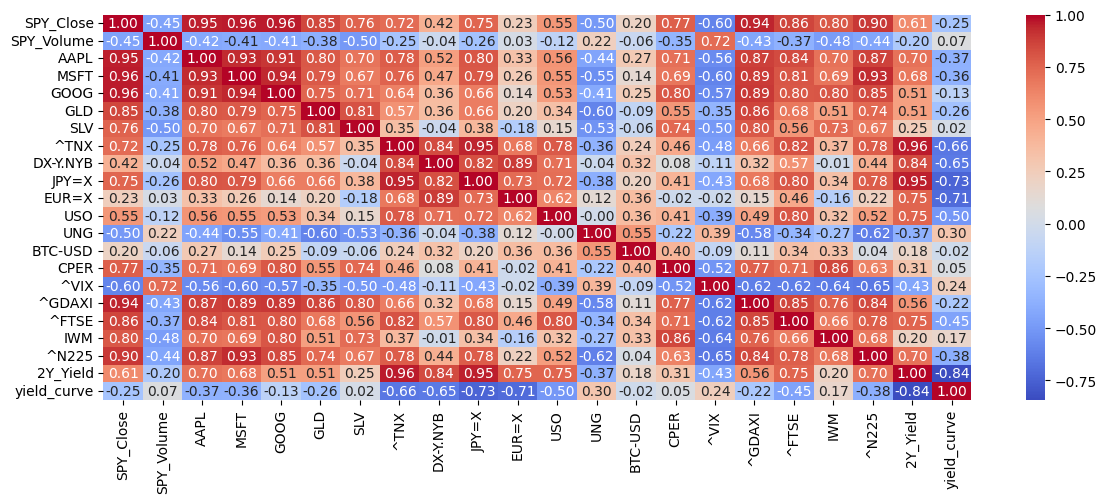

In [81]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
sns.heatmap(combined_cleaned.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# RSI

In [82]:
def RSI(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

In [87]:
combined_cleaned_add = combined_cleaned.copy()
combined_cleaned_add = pd.concat([combined_cleaned_add, add_later], axis=1)
combined_cleaned_add.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 0 to 1320
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SPY_Close            1321 non-null   float64       
 1   SPY_Volume           1321 non-null   float64       
 2   AAPL                 1321 non-null   float64       
 3   MSFT                 1321 non-null   float64       
 4   GOOG                 1321 non-null   float64       
 5   GLD                  1321 non-null   float64       
 6   SLV                  1321 non-null   float64       
 7   ^TNX                 1321 non-null   float64       
 8   DX-Y.NYB             1321 non-null   float64       
 9   JPY=X                1321 non-null   float64       
 10  EUR=X                1321 non-null   float64       
 11  USO                  1321 non-null   float64       
 12  UNG                  1321 non-null   float64       
 13  BTC-USD              1321 non-null   f

In [96]:
combined_cleaned_add['SPY_RSI'] = RSI(combined_cleaned_add['SPY_Close'], period=14)
combined_cleaned_add[['ds','SPY_RSI']].tail(30)
combined_cleaned_add['RSI_rank'] = combined_cleaned_add['SPY_RSI'].rank(pct=True)
combined_cleaned_add['RSI_rank_2'] = combined_cleaned_add['SPY_RSI'].apply(lambda x: 1 if x > 70 else (0 if x < 30 else -1))

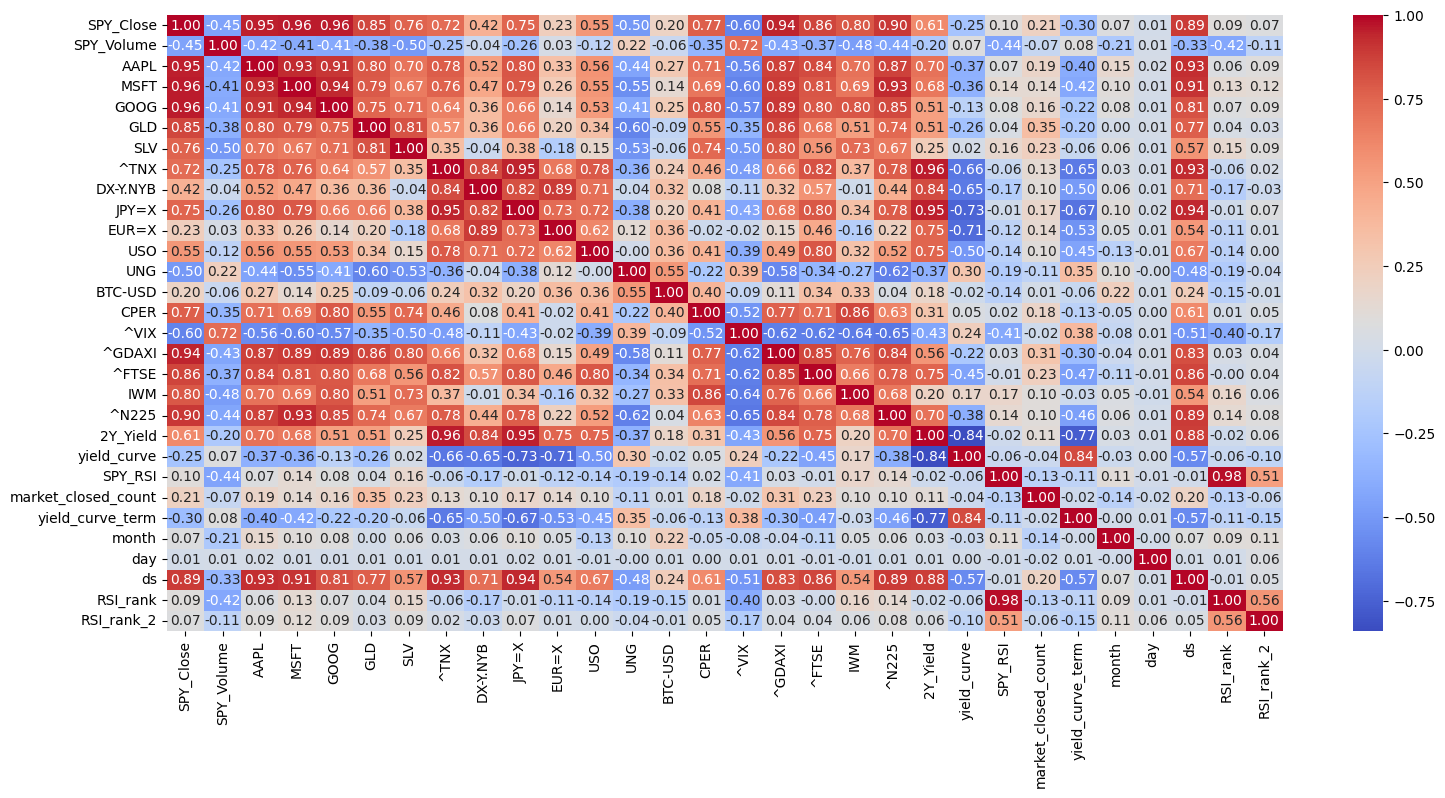

In [97]:
plt.figure(figsize=(18, 8))
sns.heatmap(combined_cleaned_add.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Add EMA

In [100]:
combined_cleaned_add['EMA_20'] = combined_cleaned_add['SPY_Close'].ewm(span=20, adjust=False).mean()
combined_cleaned_add['EMA_50'] = combined_cleaned_add['SPY_Close'].ewm(span=50, adjust=False).mean()
combined_cleaned_add['EMA_200'] = combined_cleaned_add['SPY_Close'].ewm(span=200, adjust=False).mean()

In [112]:
#combined_cleaned_add.info()
combined_cleaned_add['EMA_200'].tail(20)
# crorossing EMA:
combined_cleaned_add['EMA_20_50'] = np.where(combined_cleaned_add['EMA_20'] > combined_cleaned_add['EMA_50'], 1, 0)
combined_cleaned_add['EMA_50_200'] = np.where(combined_cleaned_add['EMA_50'] > combined_cleaned_add['EMA_200'], 1, 0)
# diff from EMA 50/200 by presantage
combined_cleaned_add['EMA_50_diff'] = (combined_cleaned_add['SPY_Close'] - combined_cleaned_add['EMA_50']) / combined_cleaned_add['SPY_Close']
combined_cleaned_add['EMA_200_diff'] = (combined_cleaned_add['SPY_Close'] - combined_cleaned_add['EMA_200']) / combined_cleaned_add['SPY_Close']


# Added columns:
EMA_20,EMA_50,EMA_200

EMA_20_50,EMA_50_200 : crossed

EMA_50_diff,EMA_200_diff : presantage diff

In [115]:
combined_cleaned_add[['EMA_20','EMA_50','EMA_200','EMA_20_50','EMA_50_200','EMA_50_diff','EMA_200_diff']].tail(30)

,EMA_20,EMA_50,EMA_200,EMA_20_50,EMA_50_200,EMA_50_diff,EMA_200_diff
1291,602.796589,597.331989,563.771653,1,1,0.001352,0.057460
1292,602.093950,597.256965,564.086551,1,1,-0.003087,0.052622
1293,601.176218,597.068761,564.368852,1,1,-0.007783,0.047411
1294,600.374372,596.899666,564.651319,1,1,-0.006989,0.047415
1295,598.747793,596.366161,564.836831,1,1,-0.022409,0.031645
1296,598.143046,596.210545,565.111071,1,1,-0.006436,0.046062
1297,596.607438,595.654020,565.279311,1,1,-0.023427,0.028762
1298,594.561957,594.849152,565.377327,0,1,-0.034287,0.016957
1299,593.299987,594.318255,565.535873,0,1,-0.022375,0.027138
1300,591.175452,593.403514,565.590167,0,1,-0.039249,0.009461


In [118]:
combined_cleaned_add.info()
# saving the added indicators data
combined_cleaned_add.to_csv('combined_cleaned_add.csv', index=False)
combined_cleaned_add.to_pickle('combined_cleaned_add.pkl')

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 0 to 1320
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SPY_Close            1321 non-null   float64       
 1   SPY_Volume           1321 non-null   float64       
 2   AAPL                 1321 non-null   float64       
 3   MSFT                 1321 non-null   float64       
 4   GOOG                 1321 non-null   float64       
 5   GLD                  1321 non-null   float64       
 6   SLV                  1321 non-null   float64       
 7   ^TNX                 1321 non-null   float64       
 8   DX-Y.NYB             1321 non-null   float64       
 9   JPY=X                1321 non-null   float64       
 10  EUR=X                1321 non-null   float64       
 11  USO                  1321 non-null   float64       
 12  UNG                  1321 non-null   float64       
 13  BTC-USD              1321 non-null   f

# Convert to presentage return

In [281]:
returns = combined_cleaned.pct_change()* 100
returns['^N225'] = returns['^N225'].fillna(0)
returns.head(10)


,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,UNG,BTC-USD,CPER,^VIX,^GDAXI,^FTSE,IWM,^N225,2Y_Yield,yield_curve
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1,-0.757199,31.374680,-0.972234,-1.245179,-0.490719,1.326852,0.178469,-4.994686,-0.010327,0.029442,...,-0.485731,-2.981929,-1.412429,12.429833,-1.246010,0.238025,-0.392050,1.598205,NaN,NaN
2,0.381478,-28.382300,0.796853,0.258509,2.465718,1.048950,0.593826,1.286354,-0.175545,-0.156373,...,1.220261,5.145166,0.114605,-1.212554,-0.697091,-0.617917,0.133229,-1.573487,-3.164557,35.096157
3,-0.281178,-27.235288,-0.470317,-0.911775,-0.062393,0.393515,1.357730,0.883492,0.320684,-0.533431,...,0.180836,0.895487,0.286211,-0.433216,0.760569,-0.018480,-0.332620,2.306033,0.653595,2.135243
4,0.532975,68.647090,1.608634,1.592815,0.788031,-0.750152,-1.397785,2.572519,0.329965,0.409397,...,0.060158,0.008915,0.399542,-2.465556,0.705759,0.013203,0.309432,0.466309,0.000000,16.376281
5,0.678065,-29.024687,2.124088,1.249341,1.104447,-0.565165,-1.240407,-0.853784,0.154156,-0.359758,...,0.240535,4.829126,-0.284248,-6.765798,1.312894,0.306277,0.120997,0.732056,2.597403,-16.766443
6,-0.287764,9.398989,0.226074,-0.462715,0.697269,0.602619,1.016747,-1.776103,-0.092351,0.939675,...,2.219561,5.077385,0.456100,0.159493,-0.087069,-0.134247,-0.374626,-0.451984,0.000000,-11.870499
7,0.687696,-11.206069,2.136399,1.202399,0.664454,-0.741948,-0.651265,1.260274,-0.010273,0.436578,...,-0.586857,-1.026859,1.702606,-1.910834,-0.235773,0.391415,0.648954,0.069202,-1.265823,17.551018
8,-0.152438,33.440370,-1.350301,-0.704296,-0.580165,-0.089154,-0.953515,-1.623381,0.020549,0.053876,...,-0.531288,-2.485086,0.334818,0.568187,0.036953,0.063009,0.367536,0.451796,1.282051,-17.361140
9,0.225981,14.679912,-0.428570,0.647601,0.581461,0.583424,1.143193,-1.650163,-0.143781,0.388802,...,-2.492582,3.648690,-0.166845,0.242129,-0.179768,0.267631,0.480260,0.175740,0.000000,-12.605032


In [203]:

#returns = combined_cleaned.pct_change()* 100
#returns['000300.SS'].fillna(0)
#for col in combined_cleaned.columns:
#    if not col.endswith('_market_close') and f'{col}_market_close' in combined_cleaned.columns:
#        mask = combined_cleaned[f'{col}_market_close'] == 1
#        returns.loc[mask, col] = 0
#returns = returns.dropna()
#market_cols = [col for col in combined_cleaned.columns if col.endswith('_market_close')]
#combined_cleaned.drop(columns=market_cols, inplace=True)
#returns.drop(columns=market_cols, inplace=True)
#returns.tail(20)


In [282]:
#r= returns.copy()
returns = pd.concat([returns,add_later],axis=1)
returns.head()


,SPY_Close,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,IWM,^N225,2Y_Yield,yield_curve,market_closed_count,yield_curve_term,month,day,ds,event
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,1,NaN,1.0,2.0,2020-01-02,none event
1,-0.757199,31.374680,-0.972234,-1.245179,-0.490719,1.326852,0.178469,-4.994686,-0.010327,0.029442,...,-0.392050,1.598205,NaN,NaN,0,1.0,1.0,3.0,2020-01-03,ISM
2,0.381478,-28.382300,0.796853,0.258509,2.465718,1.048950,0.593826,1.286354,-0.175545,-0.156373,...,0.133229,-1.573487,-3.164557,35.096157,0,1.0,1.0,6.0,2020-01-06,none event
3,-0.281178,-27.235288,-0.470317,-0.911775,-0.062393,0.393515,1.357730,0.883492,0.320684,-0.533431,...,-0.332620,2.306033,0.653595,2.135243,0,1.0,1.0,7.0,2020-01-07,none event
4,0.532975,68.647090,1.608634,1.592815,0.788031,-0.750152,-1.397785,2.572519,0.329965,0.409397,...,0.309432,0.466309,0.000000,16.376281,0,1.0,1.0,8.0,2020-01-08,none event


In [ ]:
#returns = returns.iloc[1:] # remove the first raw because its null

In [283]:
returns['SPY_Close'].min()


np.float64(-10.942373542084294)

# Add streak days 
Number of consecetive days down/up

In [284]:
# Step 1: Get the direction of return
direction = np.sign(returns['SPY_Close'].fillna(0))

# Step 2: Shift it down so current row gets info about previous days only
shifted_direction = direction.shift(1).fillna(0)

# Step 3: Build the streak
streak = []
count = 0

for change in shifted_direction:
    if change == 0:
        count = 0
    elif change > 0:
        count = count + 1 if count >= 0 else 1
    else:
        count = count - 1 if count <= 0 else -1
    streak.append(count)

# Step 4: Add to DataFrame
returns['SPY_Streak'] = streak

In [285]:

returns = returns.rename(columns={'SPY_Close':'SPY_return'}) #rename the column
returns.head(10)

,SPY_return,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,^N225,2Y_Yield,yield_curve,market_closed_count,yield_curve_term,month,day,ds,event,SPY_Streak
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,1,NaN,1.0,2.0,2020-01-02,none event,0
1,-0.757199,31.374680,-0.972234,-1.245179,-0.490719,1.326852,0.178469,-4.994686,-0.010327,0.029442,...,1.598205,NaN,NaN,0,1.0,1.0,3.0,2020-01-03,ISM,0
2,0.381478,-28.382300,0.796853,0.258509,2.465718,1.048950,0.593826,1.286354,-0.175545,-0.156373,...,-1.573487,-3.164557,35.096157,0,1.0,1.0,6.0,2020-01-06,none event,-1
3,-0.281178,-27.235288,-0.470317,-0.911775,-0.062393,0.393515,1.357730,0.883492,0.320684,-0.533431,...,2.306033,0.653595,2.135243,0,1.0,1.0,7.0,2020-01-07,none event,1
4,0.532975,68.647090,1.608634,1.592815,0.788031,-0.750152,-1.397785,2.572519,0.329965,0.409397,...,0.466309,0.000000,16.376281,0,1.0,1.0,8.0,2020-01-08,none event,-1
5,0.678065,-29.024687,2.124088,1.249341,1.104447,-0.565165,-1.240407,-0.853784,0.154156,-0.359758,...,0.732056,2.597403,-16.766443,0,1.0,1.0,9.0,2020-01-09,none event,1
6,-0.287764,9.398989,0.226074,-0.462715,0.697269,0.602619,1.016747,-1.776103,-0.092351,0.939675,...,-0.451984,0.000000,-11.870499,0,1.0,1.0,10.0,2020-01-10,nonfarm payroll,2
7,0.687696,-11.206069,2.136399,1.202399,0.664454,-0.741948,-0.651265,1.260274,-0.010273,0.436578,...,0.069202,-1.265823,17.551018,0,1.0,1.0,13.0,2020-01-13,none event,-1
8,-0.152438,33.440370,-1.350301,-0.704296,-0.580165,-0.089154,-0.953515,-1.623381,0.020549,0.053876,...,0.451796,1.282051,-17.361140,0,1.0,1.0,14.0,2020-01-14,PPI,1
9,0.225981,14.679912,-0.428570,0.647601,0.581461,0.583424,1.143193,-1.650163,-0.143781,0.388802,...,0.175740,0.000000,-12.605032,0,1.0,1.0,15.0,2020-01-15,CPI,-1


In [286]:
# Step 1: Convert percent returns to multipliers
multipliers = 1 + (returns['SPY_return'].fillna(0) / 100)
streaks = returns['SPY_Streak'].fillna(0)

# Step 2: Initialize result list
abs_changes = []

for i in range(len(returns)):
    streak = streaks.iloc[i]

    if abs(streak) <= 1:
        # Use previous day's return as-is
        abs_changes.append(returns['SPY_return'].iloc[i - 1] if i > 0 else np.nan)
    else:
        length = abs(int(streak))
        start_idx = i - length
        if start_idx < 0:
            abs_changes.append(np.nan)
        else:
            # Compute cumulative return from previous 'length' days
            cumulative_return = multipliers.iloc[start_idx:i].prod()
            abs_changes.append((cumulative_return - 1) * 100)

# Step 3: Assign the result
returns['SPY_AbsChange'] = abs_changes


In [287]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1317 entries, 0 to 1316
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SPY_return           1316 non-null   float64       
 1   SPY_Volume           1316 non-null   float64       
 2   AAPL                 1316 non-null   float64       
 3   MSFT                 1316 non-null   float64       
 4   GOOG                 1316 non-null   float64       
 5   GLD                  1316 non-null   float64       
 6   SLV                  1316 non-null   float64       
 7   ^TNX                 1316 non-null   float64       
 8   DX-Y.NYB             1316 non-null   float64       
 9   JPY=X                1316 non-null   float64       
 10  EUR=X                1316 non-null   float64       
 11  USO                  1316 non-null   float64       
 12  UNG                  1316 non-null   float64       
 13  BTC-USD              1316 non-null   f

In [289]:
returns = returns.iloc[2:] # remove the first 2 raws because its null
returns.head()

,SPY_return,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,2Y_Yield,yield_curve,market_closed_count,yield_curve_term,month,day,ds,event,SPY_Streak,SPY_AbsChange
2,0.381478,-28.382300,0.796853,0.258509,2.465718,1.048950,0.593826,1.286354,-0.175545,-0.156373,...,-3.164557,35.096157,0,1.0,1.0,6.0,2020-01-06,none event,-1,-0.757199
3,-0.281178,-27.235288,-0.470317,-0.911775,-0.062393,0.393515,1.357730,0.883492,0.320684,-0.533431,...,0.653595,2.135243,0,1.0,1.0,7.0,2020-01-07,none event,1,0.381478
4,0.532975,68.647090,1.608634,1.592815,0.788031,-0.750152,-1.397785,2.572519,0.329965,0.409397,...,0.000000,16.376281,0,1.0,1.0,8.0,2020-01-08,none event,-1,-0.281178
5,0.678065,-29.024687,2.124088,1.249341,1.104447,-0.565165,-1.240407,-0.853784,0.154156,-0.359758,...,2.597403,-16.766443,0,1.0,1.0,9.0,2020-01-09,none event,1,0.532975
6,-0.287764,9.398989,0.226074,-0.462715,0.697269,0.602619,1.016747,-1.776103,-0.092351,0.939675,...,0.000000,-11.870499,0,1.0,1.0,10.0,2020-01-10,nonfarm payroll,2,1.214653


In [290]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315 entries, 2 to 1316
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SPY_return           1315 non-null   float64       
 1   SPY_Volume           1315 non-null   float64       
 2   AAPL                 1315 non-null   float64       
 3   MSFT                 1315 non-null   float64       
 4   GOOG                 1315 non-null   float64       
 5   GLD                  1315 non-null   float64       
 6   SLV                  1315 non-null   float64       
 7   ^TNX                 1315 non-null   float64       
 8   DX-Y.NYB             1315 non-null   float64       
 9   JPY=X                1315 non-null   float64       
 10  EUR=X                1315 non-null   float64       
 11  USO                  1315 non-null   float64       
 12  UNG                  1315 non-null   float64       
 13  BTC-USD              1315 non-null   f

In [ ]:
combined_cleaned.to_pickle('Raw_stocks_data')
returns.to_pickle('data_for_model')
#returns.to_csv('data_for_model.csv',index=False)

In [ ]:
returns.head() # the file with events and date as ds 

,SPY_return,SPY_Volume,AAPL,MSFT,GOOG,GLD,SLV,^TNX,DX-Y.NYB,JPY=X,...,2Y_Yield,yield_curve,market_closed_count,yield_curve_term,month,day,ds,event,SPY_Streak,SPY_AbsChange
2,0.381478,-28.382300,0.796853,0.258509,2.465718,1.048950,0.593826,1.286354,-0.175545,-0.156373,...,-3.164557,35.096157,0,1.0,1.0,6.0,2020-01-06,none event,-1,-0.757199
3,-0.281178,-27.235288,-0.470317,-0.911775,-0.062393,0.393515,1.357730,0.883492,0.320684,-0.533431,...,0.653595,2.135243,0,1.0,1.0,7.0,2020-01-07,none event,1,0.381478
4,0.532975,68.647090,1.608634,1.592815,0.788031,-0.750152,-1.397785,2.572519,0.329965,0.409397,...,0.000000,16.376281,0,1.0,1.0,8.0,2020-01-08,none event,-1,-0.281178
5,0.678065,-29.024687,2.124088,1.249341,1.104447,-0.565165,-1.240407,-0.853784,0.154156,-0.359758,...,2.597403,-16.766443,0,1.0,1.0,9.0,2020-01-09,none event,1,0.532975
6,-0.287764,9.398989,0.226074,-0.462715,0.697269,0.602619,1.016747,-1.776103,-0.092351,0.939675,...,0.000000,-11.870499,0,1.0,1.0,10.0,2020-01-10,nonfarm payroll,2,1.214653
